In [2]:
from sklearn.datasets import load_breast_cancer
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import numpy as np
from time import time
import datetime
import pandas as pd
from sklearn.preprocessing import StandardScaler

In [3]:
data = load_breast_cancer()
X=data.data
Y=data.target

In [4]:
X.shape

(569, 30)

In [5]:
X[0,:]

array([1.799e+01, 1.038e+01, 1.228e+02, 1.001e+03, 1.184e-01, 2.776e-01,
       3.001e-01, 1.471e-01, 2.419e-01, 7.871e-02, 1.095e+00, 9.053e-01,
       8.589e+00, 1.534e+02, 6.399e-03, 4.904e-02, 5.373e-02, 1.587e-02,
       3.003e-02, 6.193e-03, 2.538e+01, 1.733e+01, 1.846e+02, 2.019e+03,
       1.622e-01, 6.656e-01, 7.119e-01, 2.654e-01, 4.601e-01, 1.189e-01])

In [7]:
Y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
       1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0,
       0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0,

In [8]:
np.unique(Y)

array([0, 1])

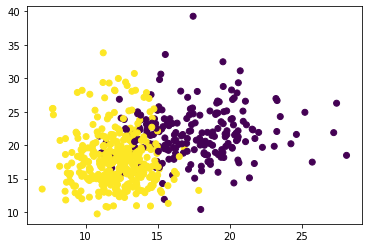

In [10]:
plt.scatter(X[:,0],X[:,1],c=Y)
plt.show()

In [11]:
X_train,X_test,y_train,y_test = train_test_split(X,Y,test_size=0.3,random_state=2019)

In [12]:
X_train.shape

(398, 30)

In [13]:
X_test.shape

(171, 30)

In [39]:
kernels = ['linear','poly','rbf','sigmoid']
for kernel in kernels:
    time0 = time()
    clf = SVC(kernel=kernel,gamma='auto',degree=1,cache_size=5000)
    clf.fit(X_train,y_train)
    print('The accuracy under kernel %s is %f ' %(kernel,clf.score(X_test,y_test)))  
    print(datetime.datetime.utcfromtimestamp(time()-time0).strftime('%M:%S:%f'))

The accuracy under kernel linear is 0.953216 
00:01:158000
The accuracy under kernel poly is 0.941520 
00:00:088000
The accuracy under kernel rbf is 0.619883 
00:00:055000
The accuracy under kernel sigmoid is 0.619883 
00:00:006000


In [50]:
data = pd.DataFrame(X)
data.describe([0.01,0.05,0.1,0.25,0.5,0.75,0.9,0.99]).T

,count,mean,std,min,1%,5%,10%,25%,50%,75%,90%,99%,max
0,569.0,-3.153111e-15,1.00088,-2.029648,-1.610057,-1.305923,-1.098366,-0.689385,-0.215082,0.469393,1.534446,2.909529,3.971288
1,569.0,-6.568462e-15,1.00088,-2.229249,-1.945253,-1.443165,-1.212786,-0.725963,-0.104636,0.584176,1.326975,2.644095,4.651889
2,569.0,-6.993039e-16,1.00088,-1.984504,-1.571053,-1.296381,-1.076672,-0.691956,-0.235980,0.499677,1.529432,3.037982,3.976130
3,569.0,-8.553985e-16,1.00088,-1.454443,-1.249201,-1.078225,-0.947908,-0.667195,-0.295187,0.363507,1.486075,3.218702,5.250529
4,569.0,6.081447e-15,1.00088,-3.112085,-1.971730,-1.517125,-1.188910,-0.710963,-0.034891,0.636199,1.313694,2.599511,4.770911
5,569.0,-1.136369e-15,1.00088,-1.610136,-1.345369,-1.206849,-1.035527,-0.747086,-0.221940,0.493857,1.347811,3.275782,4.568425
6,569.0,-2.997017e-16,1.00088,-1.114873,-1.114873,-1.052316,-0.943046,-0.743748,-0.342240,0.526062,1.434288,3.300560,4.243589
7,569.0,1.023981e-15,1.00088,-1.261820,-1.261820,-1.116837,-0.974010,-0.737944,-0.397721,0.646935,1.328412,2.973759,3.927930
8,569.0,-1.860648e-15,1.00088,-2.744117,-1.885853,-1.448032,-1.153036,-0.703240,-0.071627,0.530779,1.233221,2.862418,4.484751
9,569.0,-1.504752e-15,1.00088,-1.819865,-1.600987,-1.257643,-1.057477,-0.722639,-0.178279,0.470983,1.342243,3.209454,4.910919


In [41]:
X= StandardScaler().fit_transform(X)
data = pd.DataFrame(X)
data.describe([0.01,0.05,0.1,0.25,0.5,0.75,0.9,0.99]).T

,count,mean,std,min,1%,5%,10%,25%,50%,75%,90%,99%,max
0,569.0,-3.153111e-15,1.00088,-2.029648,-1.610057,-1.305923,-1.098366,-0.689385,-0.215082,0.469393,1.534446,2.909529,3.971288
1,569.0,-6.568462e-15,1.00088,-2.229249,-1.945253,-1.443165,-1.212786,-0.725963,-0.104636,0.584176,1.326975,2.644095,4.651889
2,569.0,-6.993039e-16,1.00088,-1.984504,-1.571053,-1.296381,-1.076672,-0.691956,-0.235980,0.499677,1.529432,3.037982,3.976130
3,569.0,-8.553985e-16,1.00088,-1.454443,-1.249201,-1.078225,-0.947908,-0.667195,-0.295187,0.363507,1.486075,3.218702,5.250529
4,569.0,6.081447e-15,1.00088,-3.112085,-1.971730,-1.517125,-1.188910,-0.710963,-0.034891,0.636199,1.313694,2.599511,4.770911
5,569.0,-1.136369e-15,1.00088,-1.610136,-1.345369,-1.206849,-1.035527,-0.747086,-0.221940,0.493857,1.347811,3.275782,4.568425
6,569.0,-2.997017e-16,1.00088,-1.114873,-1.114873,-1.052316,-0.943046,-0.743748,-0.342240,0.526062,1.434288,3.300560,4.243589
7,569.0,1.023981e-15,1.00088,-1.261820,-1.261820,-1.116837,-0.974010,-0.737944,-0.397721,0.646935,1.328412,2.973759,3.927930
8,569.0,-1.860648e-15,1.00088,-2.744117,-1.885853,-1.448032,-1.153036,-0.703240,-0.071627,0.530779,1.233221,2.862418,4.484751
9,569.0,-1.504752e-15,1.00088,-1.819865,-1.600987,-1.257643,-1.057477,-0.722639,-0.178279,0.470983,1.342243,3.209454,4.910919


In [42]:
X_train,X_test,y_train,y_test = train_test_split(X,Y,test_size=0.3,random_state=20)

In [43]:
kernels = ['linear','poly','rbf','sigmoid']
for kernel in kernels:
    time0 = time()
    clf = SVC(kernel=kernel,gamma='auto',degree=1,cache_size=5000)
    clf.fit(X_train,y_train)
    print('The accuracy under kernel %s is %f ' %(kernel,clf.score(X_test,y_test)))  
    print(datetime.datetime.utcfromtimestamp(time()-time0).strftime('%M:%S:%f'))

The accuracy under kernel linear is 0.970760 
00:00:066000
The accuracy under kernel poly is 0.994152 
00:00:004000
The accuracy under kernel rbf is 0.982456 
00:00:012000
The accuracy under kernel sigmoid is 0.976608 
00:00:029000


In [44]:
# 简单gamma调参
score=[]
gamma_range = np.logspace(-10,1,50)
gamma_range

array([1.00000000e-10, 1.67683294e-10, 2.81176870e-10, 4.71486636e-10,
       7.90604321e-10, 1.32571137e-09, 2.22299648e-09, 3.72759372e-09,
       6.25055193e-09, 1.04811313e-08, 1.75751062e-08, 2.94705170e-08,
       4.94171336e-08, 8.28642773e-08, 1.38949549e-07, 2.32995181e-07,
       3.90693994e-07, 6.55128557e-07, 1.09854114e-06, 1.84206997e-06,
       3.08884360e-06, 5.17947468e-06, 8.68511374e-06, 1.45634848e-05,
       2.44205309e-05, 4.09491506e-05, 6.86648845e-05, 1.15139540e-04,
       1.93069773e-04, 3.23745754e-04, 5.42867544e-04, 9.10298178e-04,
       1.52641797e-03, 2.55954792e-03, 4.29193426e-03, 7.19685673e-03,
       1.20679264e-02, 2.02358965e-02, 3.39322177e-02, 5.68986603e-02,
       9.54095476e-02, 1.59985872e-01, 2.68269580e-01, 4.49843267e-01,
       7.54312006e-01, 1.26485522e+00, 2.12095089e+00, 3.55648031e+00,
       5.96362332e+00, 1.00000000e+01])

0.9824561403508771 0.0339322177189533


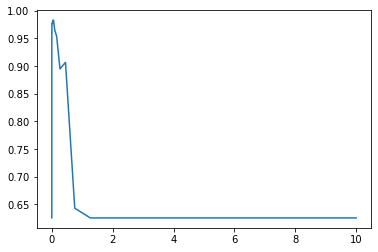

In [53]:
score=[]
for i in gamma_range:
    clf_new = SVC(kernel='rbf',gamma=i,cache_size=5000)
    clf_new.fit(X_train,y_train)
    score.append(clf_new.score(X_test,y_test))
print(max(score),gamma_range[score.index(max(score))])
plt.plot(gamma_range,score)
plt.show()

0.9824561403508771 0.6132244897959184


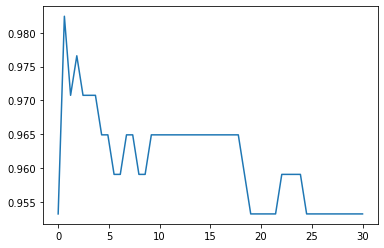

In [57]:
# linear C 调参
score=[]
C_range = np.linspace(0.001,30,50)
for i in C_range:
    clf = SVC(kernel='linear',C=i,cache_size=5000)
    clf.fit(X_train,y_train)
    score.append(clf.score(X_test,y_test))
print(max(score),C_range[score.index(max(score))])
plt.plot(C_range,score)
plt.show()

In [58]:
C_range

array([1.00000000e-03, 6.13224490e-01, 1.22544898e+00, 1.83767347e+00,
       2.44989796e+00, 3.06212245e+00, 3.67434694e+00, 4.28657143e+00,
       4.89879592e+00, 5.51102041e+00, 6.12324490e+00, 6.73546939e+00,
       7.34769388e+00, 7.95991837e+00, 8.57214286e+00, 9.18436735e+00,
       9.79659184e+00, 1.04088163e+01, 1.10210408e+01, 1.16332653e+01,
       1.22454898e+01, 1.28577143e+01, 1.34699388e+01, 1.40821633e+01,
       1.46943878e+01, 1.53066122e+01, 1.59188367e+01, 1.65310612e+01,
       1.71432857e+01, 1.77555102e+01, 1.83677347e+01, 1.89799592e+01,
       1.95921837e+01, 2.02044082e+01, 2.08166327e+01, 2.14288571e+01,
       2.20410816e+01, 2.26533061e+01, 2.32655306e+01, 2.38777551e+01,
       2.44899796e+01, 2.51022041e+01, 2.57144286e+01, 2.63266531e+01,
       2.69388776e+01, 2.75511020e+01, 2.81633265e+01, 2.87755510e+01,
       2.93877755e+01, 3.00000000e+01])

0.9941520467836257 0.04081632653061224


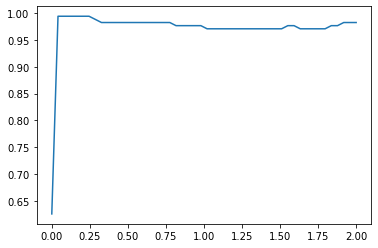

In [59]:
score=[]
C_range = np.linspace(1e-71,2,50)
for i in C_range:
    clf = SVC(kernel='linear',C=i,cache_size=5000)
    clf.fit(X_train,y_train)
    score.append(clf.score(X_test,y_test))
print(max(score),C_range[score.index(max(score))])
plt.plot(C_range,score)
plt.show()

In [60]:
clf=SVC(kernel='linear',C=0.04081632653061224,cache_size=5000)
clf.fit(X_train,y_train)
clf.score(X_test,y_test)

0.9941520467836257

0.9883040935672515 1.837673469387755


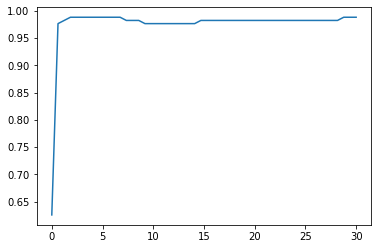

In [61]:
# rbf C 调参
score=[]
C_range = np.linspace(0.001,30,50)
for i in C_range:
    clf = SVC(kernel='rbf',C=i,cache_size=5000)
    clf.fit(X_train,y_train)
    score.append(clf.score(X_test,y_test))
print(max(score),C_range[score.index(max(score))])
plt.plot(C_range,score)
plt.show()

0.9883040935672515 1.5507246376811594


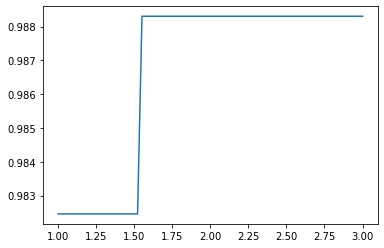

In [62]:
score=[]
C_range = np.linspace(1,3,70)
for i in C_range:
    clf = SVC(kernel='rbf',C=i,cache_size=5000)
    clf.fit(X_train,y_train)
    score.append(clf.score(X_test,y_test))
print(max(score),C_range[score.index(max(score))])
plt.plot(C_range,score)
plt.show()

In [63]:
gamma=0.007196856730011514
c=3.9565217391304346
clf=SVC(kernel='rbf',C=c,gamma=gamma,cache_size=5000)
clf.fit(X_train,y_train)
clf.score(X_test,y_test)

0.9883040935672515